In [1]:
import sqlite3
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
connection_de = sqlite3.connect("databases/deliveroo.db")
cursor_de = connection_de.cursor()
connection_tk = sqlite3.connect("databases/takeaway.db")
cursor_tk = connection_tk.cursor()
connection_ub = sqlite3.connect("databases/ubereats.db")
cursor_ub = connection_ub.cursor()

In [6]:
#Best 10 pizza places Deliveroo

cursor_de.execute("""
    SELECT DISTINCT
        restaurants.name AS restaurant, address, postal_code, rating, rating_number, longitude, latitude
    FROM
        restaurants
    LEFT JOIN 
        categories
    ON restaurants.id = categories.restaurant_id
    WHERE 
        (categories.name LIKE '%Pizza%' OR categories.name LIKE '%pizza%') AND CAST(rating_number AS int) >= 20
    ORDER BY
        rating DESC, rating_number DESC          
    LIMIT 10;
         
""")
best_pizzas_deliveroo = cursor_de.fetchall()
best_pizzas_deliveroo

[('Place 2 Eat', '6 Stationsplein', '8800', 4.7, '22', 3.1296242, 50.9483796),
 ('Les Deux Petits Diables',
  'Rue des 2 chaussées 80',
  '1160',
  4.6,
  '71',
  4.4341362,
  50.8142529),
 ('Pizza Hut Strombeek-Bever',
  'Pizza Hut Strombeek-Bever Sint-Annastraat 1 strombeek-dever 1853',
  '1853',
  4.6,
  '51',
  4.3614917,
  50.9025108),
 ('La Barchetta', 'Kerkstraat 92', '1150', 4.6, '500+', 4.4636603, 50.8408117),
 ('Pretzel King',
  '3 Sint-Amandsstraat',
  '8800',
  4.6,
  '42',
  3.122127,
  50.9480685),
 ('Sforno', 'Sasplein 11', '8000', 4.6, '401', 3.232953, 51.221074),
 ('Keurslager Michielsen',
  'Anselmostraat 43',
  '2018',
  4.6,
  '241',
  4.4040435,
  51.2065906),
 ('Da Toni',
  '1 rue des Tulipes',
  '1950',
  4.5,
  '500+',
  4.4671819,
  50.84603389999999),
 ('Plant a Pizza', '49 Geldmunt', '9000', 4.5, '500+', 3.7208654, 51.0582317),
 ('Tutti Atelier',
  'Place des Maïeurs 8',
  '1150',
  4.5,
  '385',
  4.431520234,
  50.83759256)]

In [7]:
#Best 10 pizzas takeaway

cursor_tk.execute("""
    SELECT DISTINCT
        name, address, city, ratings, ratingsNumber, longitude, latitude
    FROM
        restaurants
    LEFT JOIN
        categories_restaurants
    ON
        restaurants.primarySlug = categories_restaurants.restaurant_id          
    WHERE 
        (category_id LIKE '%Pizza%' OR category_id LIKE '%pizza%') AND ratingsNumber >= 20
    ORDER BY
        ratings DESC, ratingsNumber DESC
    LIMIT 10;
         
""")
best_pizzas_takeaway = (cursor_tk.fetchall())
best_pizzas_takeaway

[('De Echte Eethuis Carlos',
  'Herseltsesteenweg 207',
  'Aarschot',
  5,
  599,
  4.8359204,
  51.0023083),
 ('Veziroglu',
  'Franklin Rooseveltlaan 100',
  'Vilvorde',
  5,
  455,
  4.4251716,
  50.931044),
 ('Kebap - Pizza De Brug', 'Sint-Truidersteenweg 46', 'Hasselt', 5, 312, 0, 0),
 ('Trend Kebab & Pizzeria',
  'Marktstraat 1',
  'Maaseik',
  5,
  165,
  5.7923279,
  51.0940817),
 ('Pizza Minute',
  'Rue des palais 146',
  'Schaerbeek',
  4.9,
  2833,
  4.3663097,
  50.8647218),
 ('Pizza Heat',
  'Molenstraat 95',
  'Wetteren',
  4.9,
  1786,
  3.8887268,
  51.0041876),
 ('Pitza Service',
  'Koningin Elisabethlaan 118',
  'Sint-Niklaas',
  4.9,
  1315,
  4.153305,
  51.1711537),
 ('Pizza Time Evergem',
  'Eindeken 9',
  'Evergem',
  4.9,
  1148,
  3.7086842,
  51.1081395),
 ('Baskent Meerhout',
  'Bevrijdingslaan 231a',
  'Meerhout',
  4.9,
  879,
  5.0539219,
  51.1210878),
 ('Pitta Seker',
  'Botermelkstraat 76',
  'Aalst',
  4.9,
  857,
  4.0630978,
  50.954109)]

In [43]:
#Best UberEats hummus place

cursor_ub.execute("""
    SELECT DISTINCT
        title, location__street_address, location__city, rating__rating_value, rating__review_count
    FROM
        restaurants
    LEFT JOIN
        menu_items
    ON
        restaurants.id = menu_items.restaurant_id          
    WHERE 
        (name LIKE '%Hummus%' OR name LIKE '%hummus%') AND CAST(rating__review_count AS int) > 20
    ORDER BY 
        rating__rating_value DESC, rating__review_count DESC
    LIMIT 1;
         
""")

cursor_ub.fetchall()[0]

('Mosaic Leuven', 'Oude Markt 25', 'Leuven', 4.8, '34')

In [47]:
#Best Deliveroo hummus place

cursor_de.execute("""
    SELECT DISTINCT
        restaurants.name AS restaurant, address, postal_code, rating, rating_number
    FROM
        restaurants
    LEFT JOIN 
        menu_items
    ON restaurants.id = menu_items.restaurant_id
    WHERE 
        (menu_items.name LIKE '%Hummus%' OR menu_items.name LIKE '%hummus%') AND CAST(rating_number AS int) > 20       
    ORDER BY 
        rating DESC, rating_number DESC
    LIMIT 1;
         
""")

cursor_de.fetchall()[0]

('Plus+', 'Ajuinlei 14', '9000', 4.7, '93')

In [51]:
#Best Takeaway hummus place

cursor_tk.execute("""
    SELECT DISTINCT
        restaurants.name, address, city, ratings, ratingsNumber
    FROM
        restaurants
    LEFT JOIN
        menuItems
    ON
        restaurants.primarySlug = menuItems.primarySlug          
    WHERE 
        (menuItems.name LIKE '%Hummus%' OR menuItems.name LIKE '%hummus%') AND ratingsNumber > 20
    ORDER BY 
        ratings DESC, ratingsNumber DESC
    LIMIT 10
;
         
""")

cursor_tk.fetchall()[0]

('Restaurant le Royal',
 'Chaussée de Louvain 188',
 'Bruxelles-Capitale',
 5,
 359)

In [8]:
#Best 10 pizzas ubereats

cursor_ub.execute("""
    SELECT DISTINCT
        title, location__street_address, location__city, rating__rating_value, rating__review_count, location__longitude, location__latitude
    FROM
        restaurants
    LEFT JOIN
        restaurant_to_categories
    ON
        restaurants.id = restaurant_to_categories.restaurant_id          
    WHERE 
        (category LIKE '%Pizza%' OR category LIKE '%pizza%') AND CAST(rating__review_count AS int) >= 20
    ORDER BY 
        rating__rating_value DESC, rating__review_count DESC
    LIMIT 10;
         
""")
best_pizzas_ubereats = (cursor_ub.fetchall())
best_pizzas_ubereats

[('Pizza Autentica',
  'De Limburg Stirumlaan 2',
  'Wemmel',
  4.9,
  '36',
  '4.3079471',
  '50.9062595'),
 ('Pizarro', 'Melkmarkt 25', 'Antwerpen', 4.8, '82', '4.40312', '51.22011'),
 ('Kalura', 'Prinsesstraat 38', 'Antwerpen', 4.7, '63', '4.40995', '51.22108'),
 ('Pizzeria Gloria ',
  'Hallesesteenweg 8',
  'Alsemberg',
  4.7,
  '29',
  '4.3375574',
  '50.7402458'),
 ('Great Market - Traiteur / Pizzas',
  'ChaussÃ©e de Louvain 650',
  'Schaerbeek',
  4.7,
  '21',
  '4.40126',
  '50.85548'),
 ('MiTo Orban / Milano Torino',
  '2 Avenue Orban',
  'Woluwe-Saint-Pierre',
  4.7,
  '200+',
  '4.45175',
  '50.83147'),
 ('Pita Amon',
  'Dageraadplaats 27',
  'Antwerp',
  4.7,
  '20',
  '4.4297784',
  '51.2070266'),
 ('Pizzeria Saporito',
  'Vrijheidstraat 20',
  'Aalst',
  4.6,
  '99',
  '4.03503',
  '50.94034'),
 ('Pizza Pasta Nr 1 - City',
  'Graaf van Hoornestraat 57',
  'Antwerp',
  4.6,
  '82',
  '4.3927748',
  '51.2066982'),
 ('Boo-Bo Pizza & Pasta ',
  '916 Leuvensesteenweg',
  'Ever

In [26]:
def get_pizza_gdf(query_result):

    cols_names = ['restaurant_name', 'address', 'city', 'rating', 'ratings_nr', 'longitude', 'latitude']

    pizzas_dict = {}

    for col in cols_names:
        i = cols_names.index(col)
        prop_lst = []
        for pizza_place in query_result:
            prop_lst.append(pizza_place[i])
        pizzas_dict[col] = prop_lst
    pizzas_df = pd.DataFrame(pizzas_dict)
    pizzas_df['longitude'] = pizzas_df['longitude'].astype(float)
    pizzas_df['latitude'] = pizzas_df['latitude'].astype(float)
    pizzas_gdf = gpd.GeoDataFrame(pizzas_df, geometry=gpd.points_from_xy(pizzas_df['longitude'], pizzas_df['latitude']))
    pizzas_gdf.set_crs(epsg=4326, inplace=True)

    return pizzas_gdf


In [27]:
best_pizzas_ubereats_gdf = get_pizza_gdf(best_pizzas_ubereats)
best_pizzas_takeaway_gdf = get_pizza_gdf(best_pizzas_takeaway)
best_pizzas_deliveroo_gdf = get_pizza_gdf(best_pizzas_deliveroo)

In [34]:
all_pizzas_gdf = pd.concat([best_pizzas_deliveroo_gdf, best_pizzas_takeaway_gdf, best_pizzas_ubereats_gdf], ignore_index=True)

In [ ]:
all_pizzas_gdf.explore(style_kwds={'weightint': 100, 'fillOpacity': 1, 'fillColor': 'red', 'color': 'red'})

In [6]:
#Average kapsalons price Ubereats

cursor_ub.execute("""
    SELECT
        ROUND(AVG(price) / 100, 2) 
    FROM
        menu_items       
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'
;
         
""")
kapsalons_avg_ub = cursor_ub.fetchall()[0][0]
kapsalons_avg_ub

9.66

In [7]:
#Average kapsalons price Deliveroo

cursor_de.execute("""
    SELECT 
        ROUND(AVG(price), 2)
    FROM
        menu_items
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'        
    ;
         
""")

kapsalons_avg_de = cursor_de.fetchall()[0][0]
kapsalons_avg_de

9.05

In [8]:
#Average kapsalons price Takeaway

cursor_tk.execute("""
    SELECT 
        ROUND(AVG(price), 2)
    FROM
        menuItems     
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'
;
         
""")

kapsalons_avg_tk = cursor_tk.fetchall()[0][0]
kapsalons_avg_tk

11.15

In [9]:
#Average of all kapsalon prices

cursor_ub.execute("""
    SELECT
        price / 100
    FROM
        menu_items       
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'
;
         
""")

cursor_de.execute("""
    SELECT 
        price
    FROM
        menu_items
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'        
    ;
         
""")

cursor_tk.execute("""
    SELECT 
        price
    FROM
        menuItems     
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%'
;
         
""")

#print(len(cursor_ub.fetchall()), len(cursor_de.fetchall()), len(cursor_tk.fetchall()))
all_kapsalon_prices = (cursor_ub.fetchall() + cursor_de.fetchall() + cursor_tk.fetchall())
kapsalon_prices_sum = 0
for price in all_kapsalon_prices:
    num_price = float(price[0])
    kapsalon_prices_sum += num_price
all_kapsalon_avg = round(kapsalon_prices_sum / len(all_kapsalon_prices), 2)
all_kapsalon_avg

10.68

In [10]:
region = gpd.read_file('map/régions_08.shp')
region = region.to_crs(epsg=4326)

In [14]:
#Retrieve kapsalon locations on Ubereats 

cursor_ub.execute("""
    SELECT DISTINCT
        location__longitude, location__latitude
    FROM
        restaurants
    LEFT JOIN
        menu_items
    ON
        restaurants.id = menu_items.restaurant_id          
    WHERE 
        name LIKE '%Kapsalon%' OR name LIKE '%kapsalon%';
         
""")

ub_kapsalons_locations =  cursor_ub.fetchall()
ub_kapsalon_df = pd.DataFrame(ub_kapsalons_locations, columns=['longitude', 'latitude'])

ub_kapsalon_df['longitude'] = ub_kapsalon_df['longitude'].astype(float)
ub_kapsalon_df['latitude'] = ub_kapsalon_df['latitude'].astype(float)

In [86]:
ub_kapsalon_gdf = gpd.GeoDataFrame(ub_kapsalon_df, geometry=gpd.points_from_xy(ub_kapsalon_df['longitude'], ub_kapsalon_df['latitude']))
ub_kapsalon_gdf.set_crs(epsg=4326, inplace=True)

,longitude,latitude,geometry
0,4.439240,51.240870,POINT (4.43924 51.24087)
1,4.949770,51.315330,POINT (4.94977 51.31533)
2,4.401880,51.220550,POINT (4.40188 51.22055)
3,4.039110,50.941184,POINT (4.03911 50.94118)
4,4.424320,51.197410,POINT (4.42432 51.19741)
...,...,...,...
268,3.430650,50.887620,POINT (3.43065 50.88762)
269,4.420110,51.219130,POINT (4.42011 51.21913)
270,2.977816,51.199303,POINT (2.97782 51.1993)
271,3.710020,51.056680,POINT (3.71002 51.05668)


In [ ]:
ub_kapsalon_gdf.explore()

<Axes: >

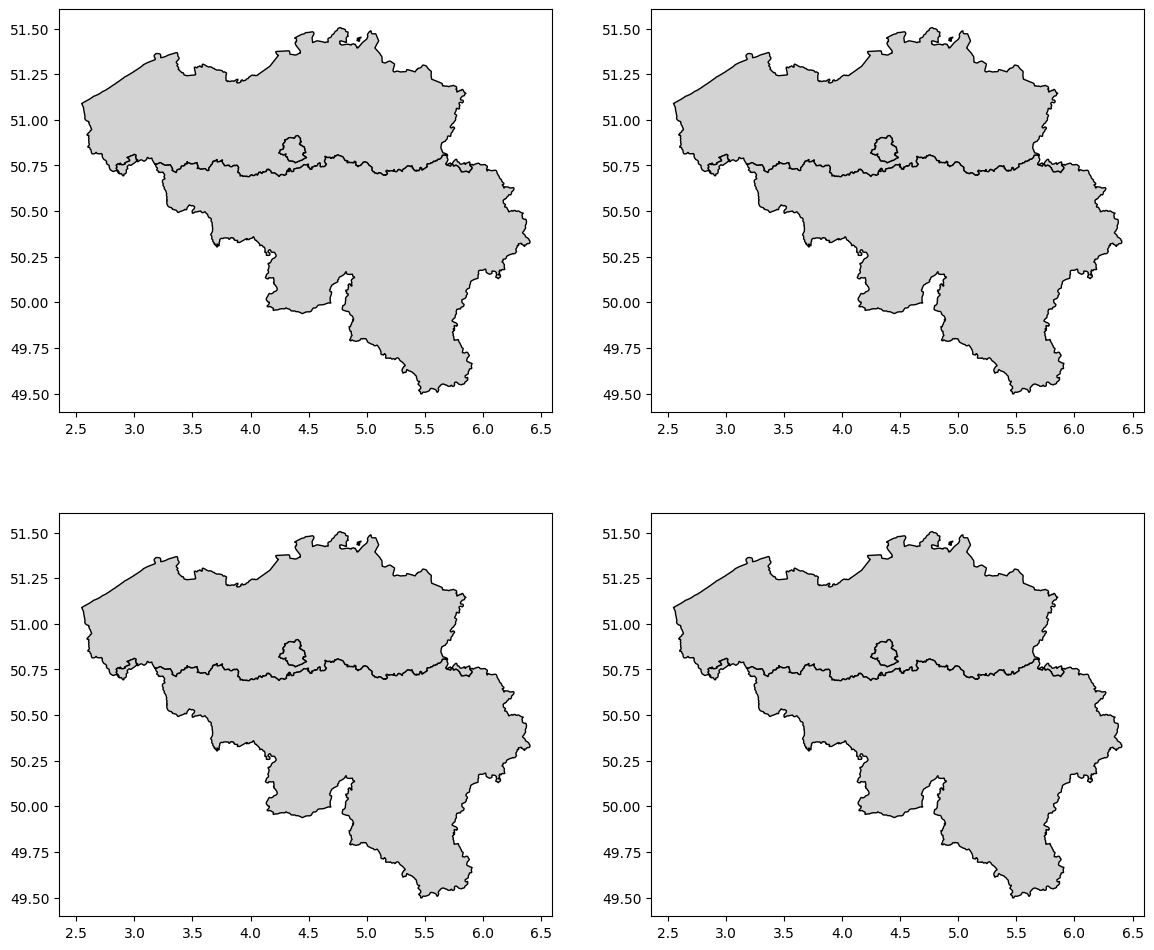

In [26]:
#Creating grid for kapsalons mapping

fig_kapsalons, axs = plt.subplots(2, 2, figsize=(14, 12))
region.plot(ax=axs[0,0], color='lightgray', edgecolor='black')
region.plot(ax=axs[0,1], color='lightgray', edgecolor='black')
region.plot(ax=axs[1,0], color='lightgray', edgecolor='black')
region.plot(ax=axs[1,1], color='lightgray', edgecolor='black')

In [50]:
#Mapping kapsalon locations on Ubereats 

ax = axs[0,1]
sns.scatterplot(x='longitude', y='latitude', data=ub_kapsalon_df, color='red', ax=ax)
ax.set_xlim(2.5, 6)
ax.set_ylim(50.5, 51.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('UberEats Kapsalons, avg. 9.66 €')


Text(0.5, 1.0, 'UberEats Kapsalons, avg. 9.66 €')

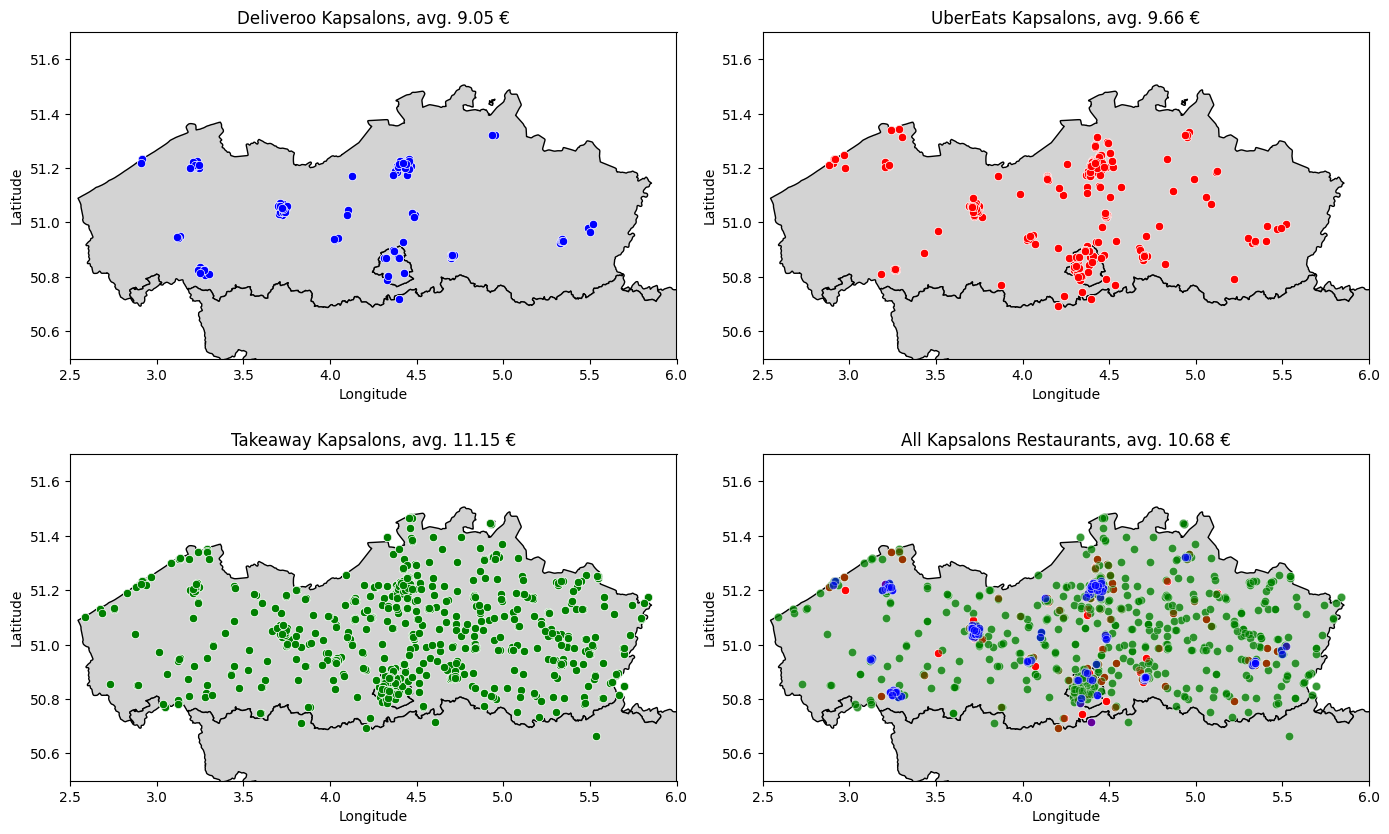

In [59]:
fig_kapsalons



In [33]:
#Retrieve kapsalon locations on Deliveroo

cursor_de.execute("""
    SELECT DISTINCT
        longitude, latitude 
    FROM
        restaurants
    LEFT JOIN 
        menu_items
    ON restaurants.id = menu_items.restaurant_id
    WHERE 
        (menu_items.name LIKE '%Kapsalon%' OR menu_items.name LIKE '%kapsalon%')        
    ;
         
""")

de_kapsalon_locations = cursor_de.fetchall()
de_kapsalon_df = pd.DataFrame(de_kapsalon_locations, columns=['longitude', 'latitude'])

de_kapsalon_df['longitude'] = de_kapsalon_df['longitude'].astype(float)
de_kapsalon_df['latitude'] = de_kapsalon_df['latitude'].astype(float)

In [56]:
#Mapping kapsalon locations on Deliveroo 

ax = axs[0,0]
sns.scatterplot(x='longitude', y='latitude', data=de_kapsalon_df, color='blue', ax=ax)
ax.set_xlim(2.5, 6)
ax.set_ylim(50.5, 51.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Deliveroo Kapsalons, avg. 9.05 €')

Text(0.5, 1.0, 'Deliveroo Kapsalons, avg. 9.05 €')

In [36]:
#Retrieve kapsalon locations on Takeaway

cursor_tk.execute("""
    SELECT DISTINCT
        longitude, latitude
    FROM
        restaurants
    LEFT JOIN
        menuItems
    ON
        restaurants.primarySlug = menuItems.primarySlug          
    WHERE 
        (menuItems.name LIKE '%Kapsalon%' OR menuItems.name LIKE '%kapsalon%')
;
         
""")

tk_kapsalon_locations = cursor_tk.fetchall()
tk_kapsalon_df = pd.DataFrame(tk_kapsalon_locations, columns=['longitude', 'latitude'])


In [57]:
#Mapping kapsalon locations on Takeaway 

ax = axs[1,0]
sns.scatterplot(x='longitude', y='latitude', data=tk_kapsalon_df, color='green', ax=ax)
ax.set_xlim(2.5, 6)
ax.set_ylim(50.5, 51.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Takeaway Kapsalons, avg. 11.15 €')

Text(0.5, 1.0, 'Takeaway Kapsalons, avg. 11.15 €')

In [58]:
ax = axs[1,1]
sns.scatterplot(x='longitude', y='latitude', data=ub_kapsalon_df, color='red', ax=ax)
sns.scatterplot(x='longitude', y='latitude', data=tk_kapsalon_df, color='green', alpha=0.4, ax=ax)
sns.scatterplot(x='longitude', y='latitude', data=de_kapsalon_df, color='blue', alpha=0.6, ax=ax)
ax.set_xlim(2.5, 6)
ax.set_ylim(50.5, 51.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('All Kapsalons Restaurants, avg. 10.68 €')

Text(0.5, 1.0, 'All Kapsalons Restaurants, avg. 10.68 €')

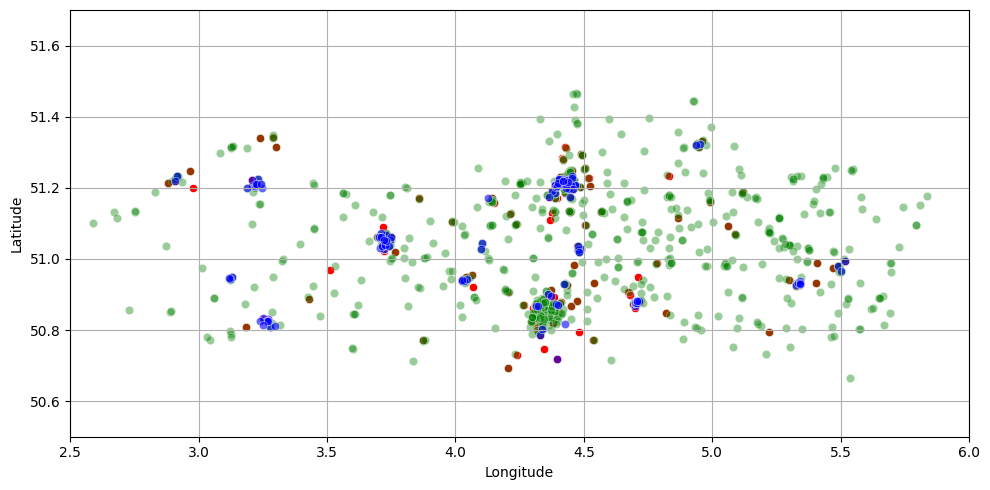

In [ ]:
#Mapping all kapsalons in Belgium

plt.figure(figsize=(10, 5))
sns.scatterplot(x='longitude', y='latitude', data=ub_kapsalon_df, color='red')
sns.scatterplot(x='longitude', y='latitude', data=tk_kapsalon_df, color='green', alpha=0.4)
sns.scatterplot(x='longitude', y='latitude', data=de_kapsalon_df, color='blue', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(50.50, 51.70)
plt.xlim(2.5, 6)
plt.grid(True)
plt.tight_layout()

In [60]:
#Query for Takeaway item prices

cursor_tk.execute("""
    SELECT 
        price
    FROM
        menuItems
;         
""")

prices_tk = cursor_tk.fetchall()
tk_prices_df = pd.DataFrame(prices_tk, columns=['price'])

Text(0.5, 1.0, 'Takeaway price distribution')

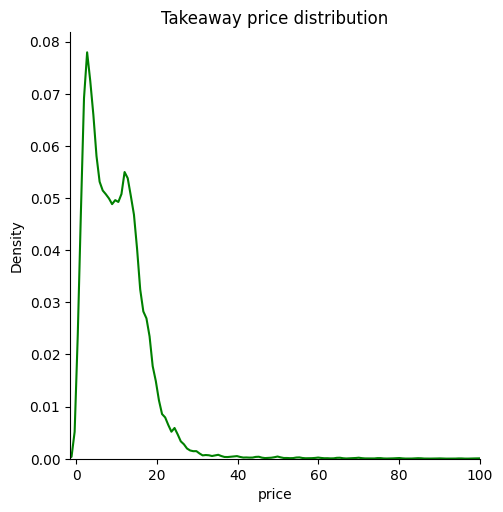

In [61]:
#Plot distribution of Takeaway prices

sns.displot(data=tk_prices_df, x='price', kind='kde', color='green')
plt.xlim(-1.5, 100)
plt.title('Takeaway price distribution')

In [62]:
#Query for Ubereats item prices

cursor_ub.execute("""
        SELECT price / 100
        FROM menu_items
              
"""
)

ub_prices_df = pd.DataFrame(cursor_ub.fetchall(), columns=['price'])

Text(0.5, 1.0, 'UberEats price distribution')

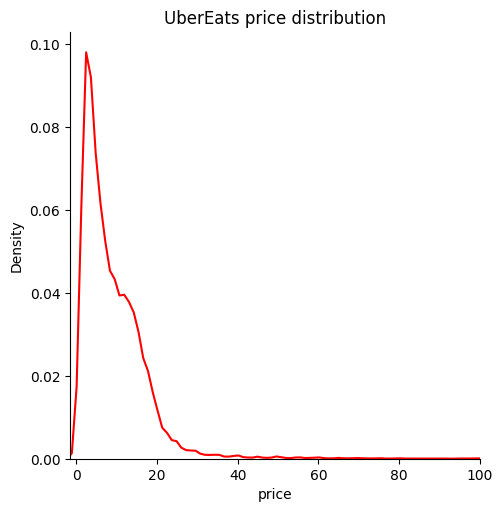

In [63]:
#Plot distribution of Ubereats prices

sns.displot(data=ub_prices_df, x='price', kind='kde', color='red')
plt.xlim(-1.5, 100)
plt.title('UberEats price distribution')

In [64]:
#Query for Deliveroo item prices

cursor_de.execute("""
    SELECT 
        price
    FROM
        menu_items
;         
"""    
)

de_prices_df = pd.DataFrame(cursor_de.fetchall(), columns=['price'])
de_prices_df['price'] = de_prices_df['price'].astype(float)

Text(0.5, 1.0, 'Deliveroo price distribution')

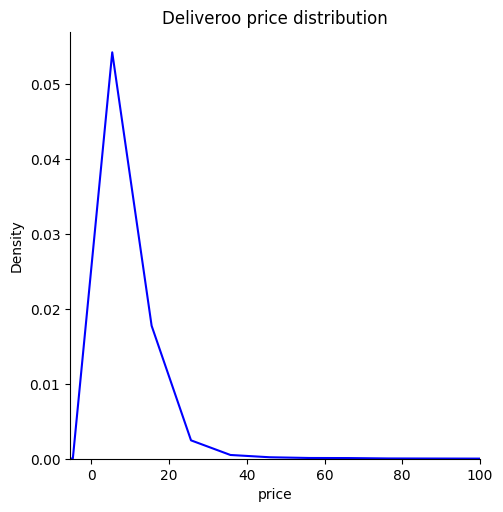

In [65]:
#Plot distribution of Deliveroo prices

sns.displot(data=de_prices_df, x='price', kind='kde', color='blue')
plt.xlim(-5.5, 100)
plt.title('Deliveroo price distribution')

Text(0.5, 1.0, 'All prices distribution')

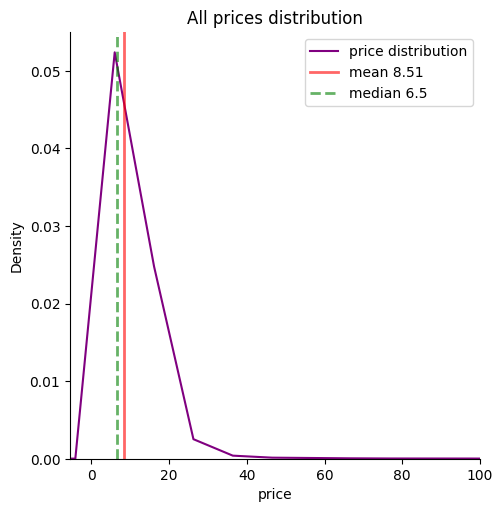

In [66]:
#Plot distribution of all prices

full_prices = pd.concat([de_prices_df, tk_prices_df, ub_prices_df], ignore_index=True)
plot = sns.displot(data=full_prices, x='price', kind='kde', color='purple', label='price distribution')
plt.axvline(x=full_prices.price.mean(), linewidth=2, color='red', label="mean", alpha=0.6)
plt.axvline(x=full_prices.price.median(), linewidth=2, color='green', label="median", alpha=0.6, ls='--')
plt.xlim(-5.5, 100)
plt.legend(['price distribution', 'mean 8.51', 'median 6.5'])
plt.title('All prices distribution')

In [ ]:
#Average delivery price Deliveroo

cursor_de.execute(""" 
    SELECT ROUND(AVG(delivery_fee), 2)
    FROM restaurants

""")

delivery_avg_de = cursor_de.fetchall()[0][0]
delivery_avg_de

4.96

In [135]:
#Grouped delivery price Deliveroo - very similar overall

cursor_de.execute(""" 
    SELECT ROUND(AVG(delivery_fee), 2), postal_code
    FROM restaurants
    GROUP BY postal_code
""")

cursor_de.fetchall()

[(4.99, ''),
 (4.99, '1000'),
 (4.41, '1020'),
 (4.99, '1030'),
 (4.99, '1040'),
 (4.99, '1060'),
 (4.99, '1080'),
 (4.99, '1081'),
 (4.99, '1082'),
 (4.99, '1083'),
 (4.93, '1090'),
 (4.99, '1120'),
 (4.99, '1130'),
 (4.99, '1140'),
 (4.85, '1150'),
 (4.99, '1160'),
 (4.99, '1180'),
 (4.99, '1190'),
 (4.99, '1200'),
 (4.99, '1210'),
 (4.99, '1330'),
 (4.99, '1410'),
 (4.99, '1600'),
 (4.99, '1620'),
 (4.99, '1700'),
 (4.99, '1702'),
 (4.99, '1780'),
 (4.68, '1800'),
 (4.99, '1830'),
 (4.99, '1831'),
 (4.99, '1850'),
 (4.99, '1853'),
 (4.99, '1930'),
 (4.99, '1932'),
 (4.99, '1950'),
 (4.99, '1970'),
 (4.98, '2000'),
 (4.93, '2018'),
 (4.99, '2020'),
 (4.99, '2030'),
 (1.0, '2050'),
 (4.99, '2060'),
 (4.99, '2060ANTWERP'),
 (4.99, '2100'),
 (4.99, '2110'),
 (4.92, '2140'),
 (4.99, '2150'),
 (4.99, '2160'),
 (4.99, '2170'),
 (4.99, '2180'),
 (4.99, '2300'),
 (4.99, '2360'),
 (4.93, '2600'),
 (4.99, '2610'),
 (4.99, '2640'),
 (4.99, '2660'),
 (4.99, '2800'),
 (4.99, '2812'),
 (4.99, '290

In [ ]:
#Average delivery price Takeaway

cursor_tk.execute(""" 
    SELECT ROUND(AVG(deliveryFee), 2)
    FROM restaurants

""")

delivery_avg_tk = cursor_tk.fetchall()[0][0]
delivery_avg_tk

2.7

In [133]:
#Grouped delivery price Takeaway - bigger disparity, there are free deliveries

cursor_tk.execute(""" 
    SELECT ROUND(AVG(deliveryFee), 2), city
    FROM restaurants
    GROUP BY city

""")
cursor_tk.fetchall()

[(2.83, ''),
 (0.0, '1040'),
 (0.93, 'Aalst'),
 (1.0, 'Aalter'),
 (1.19, 'Aarschot'),
 (0.0, 'Aarsele'),
 (0.0, 'Aarstelaar'),
 (0.5, 'Aartselaar'),
 (1.5, 'Affligem'),
 (0.0, 'Alken'),
 (1.17, 'Alost'),
 (0.0, 'Alsemberg'),
 (4.24, 'Anderlecht'),
 (6.5, 'Ans'),
 (4.17, 'Antwerp'),
 (3.68, 'Antwerpen'),
 (0.0, 'Antwerpen-Zuid'),
 (2.68, 'Anvers'),
 (4.84, 'Anwterpen'),
 (0.0, 'Anzegem'),
 (3.5, 'Ardooie'),
 (0.75, 'Arendonk'),
 (2.5, 'As'),
 (2.62, 'Asse'),
 (4.49, 'Assebroek'),
 (10.0, 'Ath'),
 (6.25, 'Aubel'),
 (3.91, 'Auderghem'),
 (0.0, 'Averbode'),
 (4.0, 'Awans'),
 (0.0, 'Baardegem'),
 (3.0, 'Baarle-Hertog'),
 (2.5, 'Baarle-Nassau'),
 (2.13, 'Balen'),
 (3.0, 'Beersel'),
 (2.5, 'Begijnendijk'),
 (1.5, 'Belsele'),
 (2.67, 'Berchem'),
 (0.0, 'Berchem sainte Agathe'),
 (3.0, 'Berchem-Saint-Agathes'),
 (0.58, 'Berchem-Sainte-Agathe'),
 (0.0, 'Berendrecht'),
 (1.25, 'Beringen'),
 (0.0, 'Beringen-mijn'),
 (0.0, 'Berlaar'),
 (0.5, 'Berlare'),
 (3.5, 'Betekom'),
 (1.29, 'Beveren'),
 (0.98